In [1]:
#import all the libraries required
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("D:\DATA SC_Practice Project\p2\winequality-red.csv")#REading the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# shape of the datframe
data.shape

(1599, 12)

In [4]:
# The dataset consists of 1599 rows and 12 columsn out of which the quality  column is the target variable

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.every features is a float datatype
2.The features is an integer values and is a discrete categorical feature

In [6]:
# description of the datset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Data describe method doesn't show categorical state, we use isna() to check nulls
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
len(data.columns)

12

<AxesSubplot:>

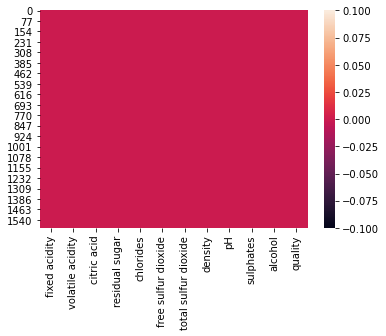

In [9]:
sns.heatmap(data.isna())

In [10]:
#there is no missing data in the dataset
#also as the datatype of all the feature is float,there can be no dirty values(excluding outliers)

# EDA

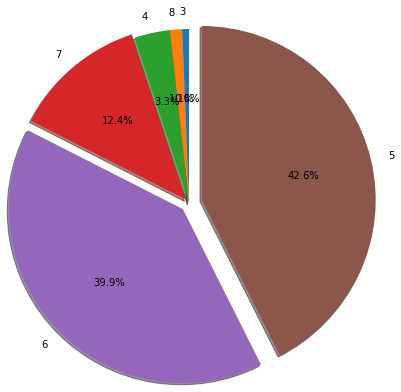

In [11]:
# A pie chart 

df_pie = data.quality.value_counts().reset_index()
df_pie = df_pie.sort_values(by='quality')

quality_count = list(df_pie.iloc[:,1])
quality_labels = list(df_pie.iloc[:,0])

plt.pie(quality_count,labels=quality_labels,radius=2,autopct='%0.1f%%',shadow=True,startangle=90,explode=[0,0,0,0.05,0.1,0.15],);

C:\Users\Dell indpiron 15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


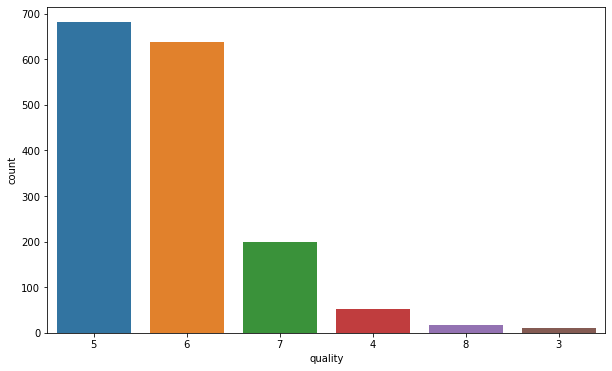

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data.quality,palette='tab10',order=data.quality.value_counts().index)
import warnings
warnings.filterwarnings('ignore')

In [81]:
#The dataset is pretty biased

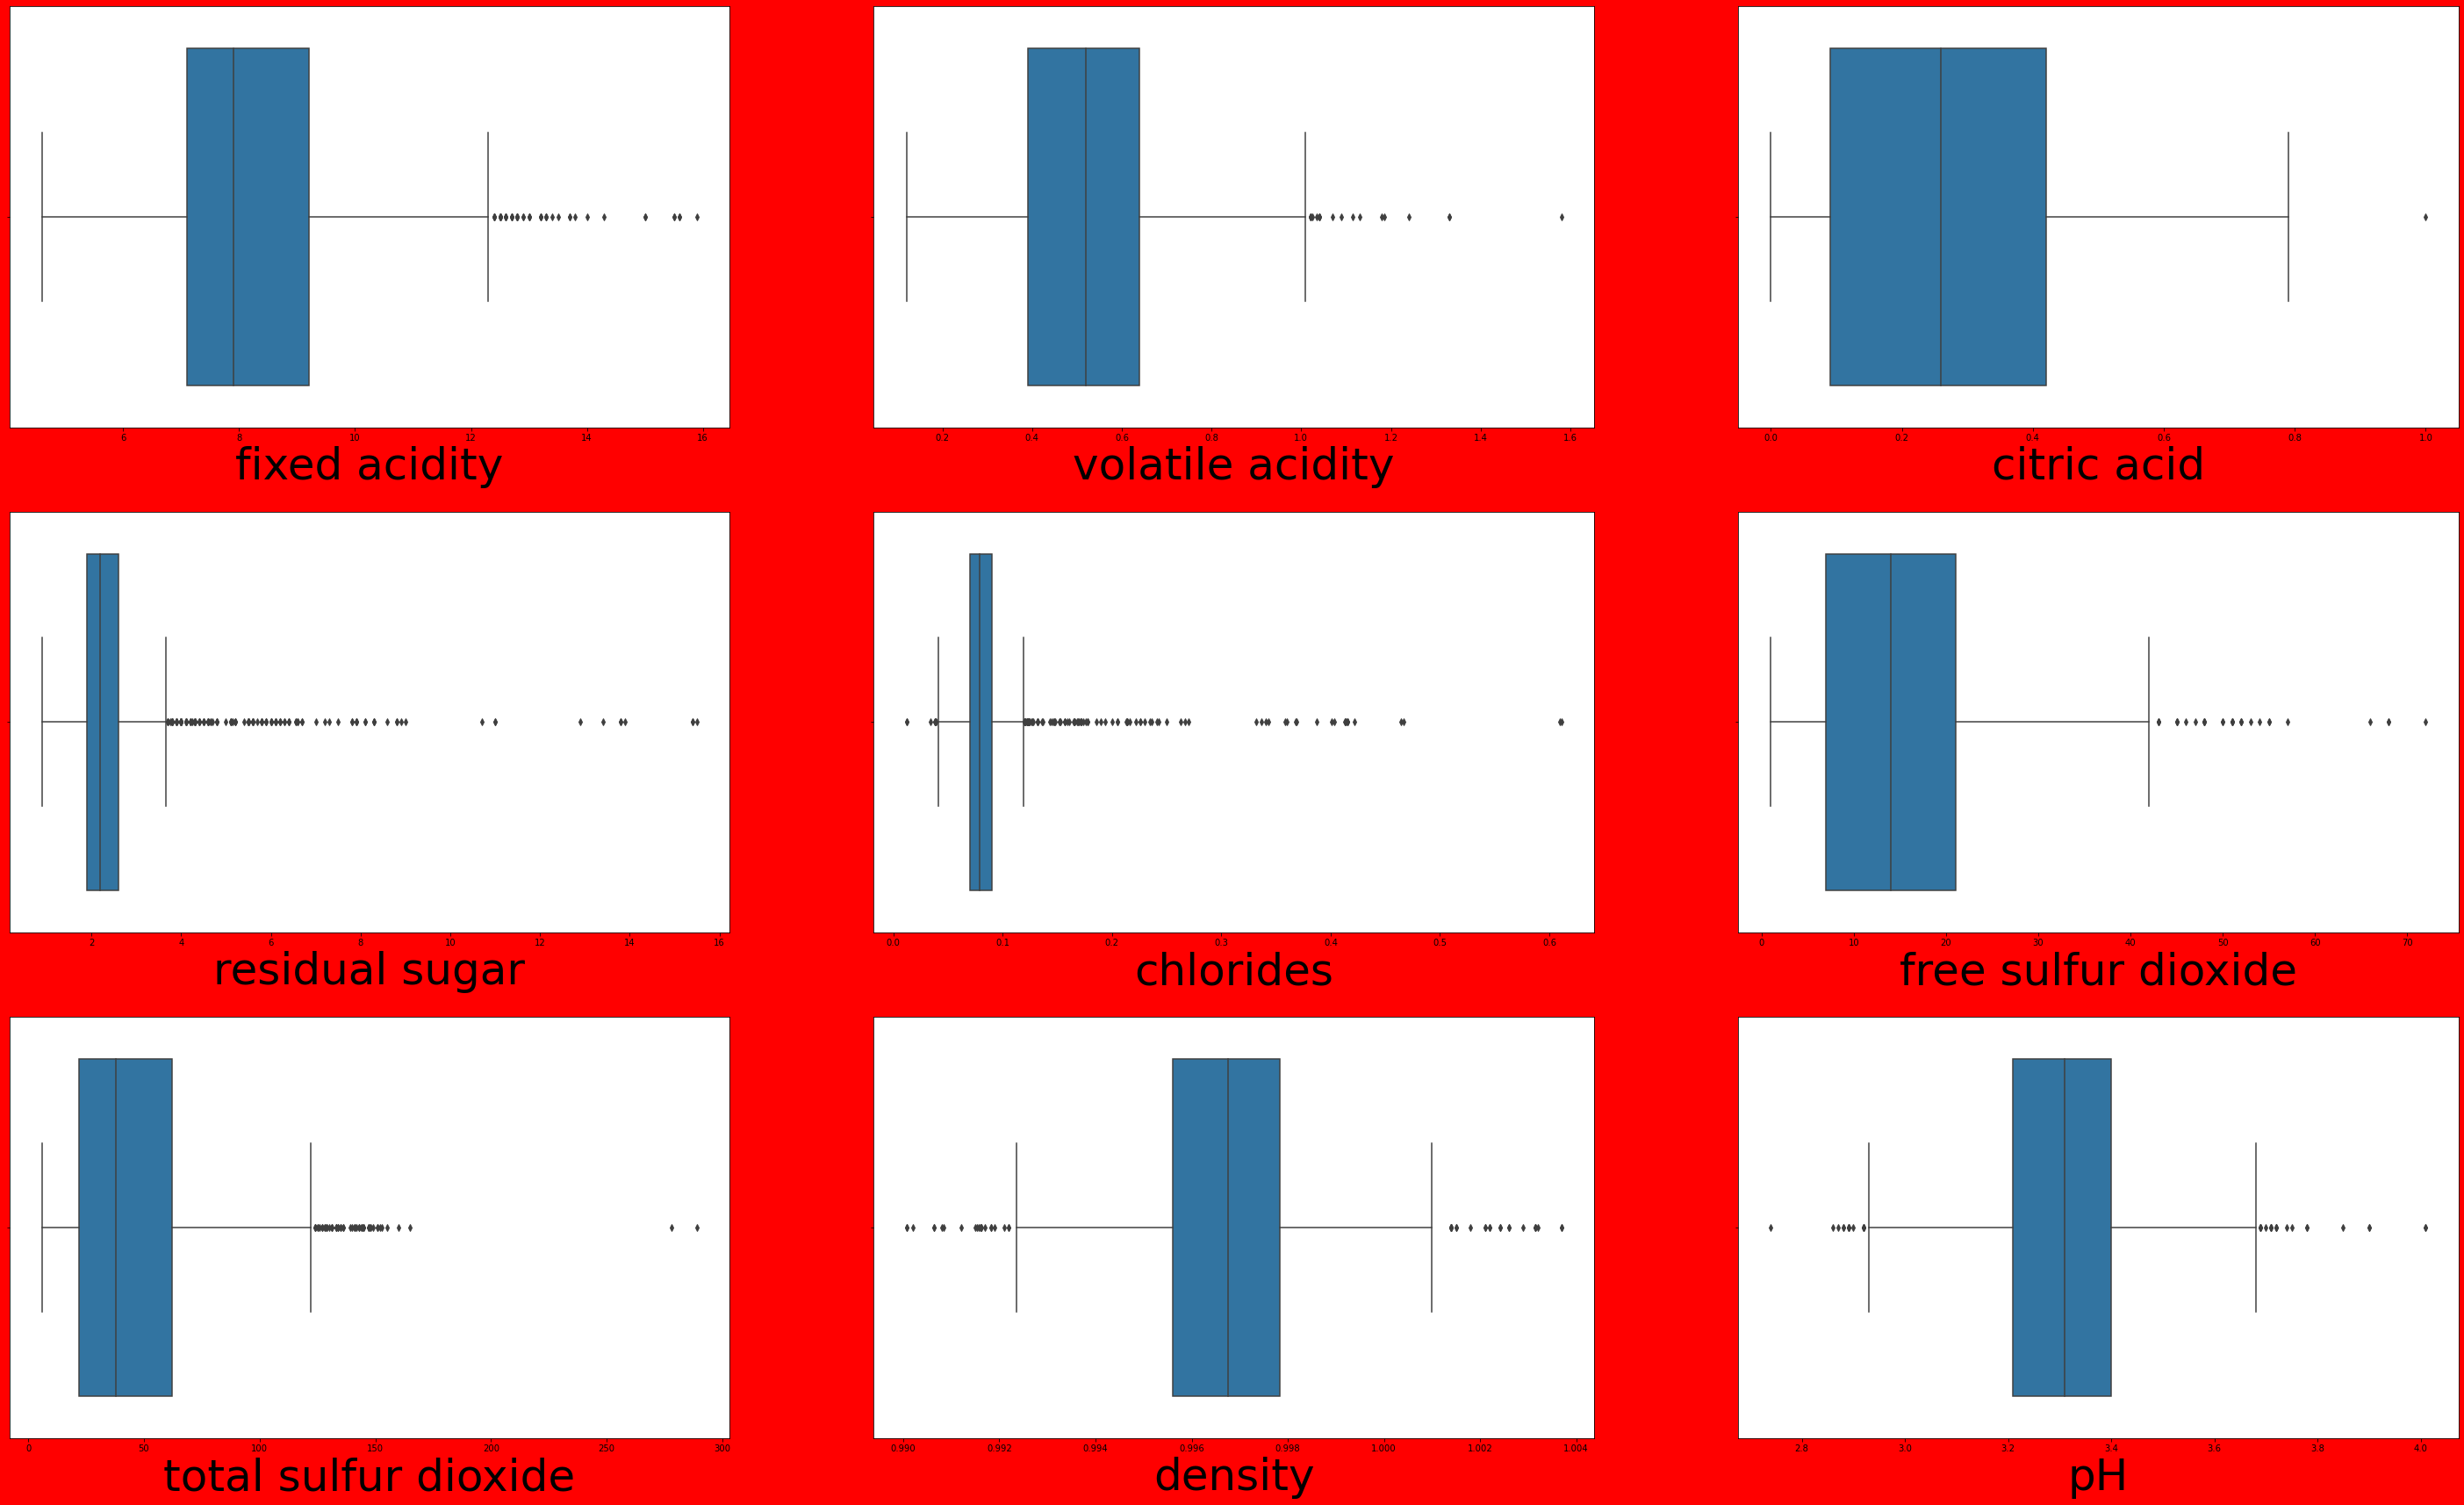

In [82]:
#Lets see how data is distributed for every column
plt.figure(figsize=(50,30), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=50)
        
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='density'>

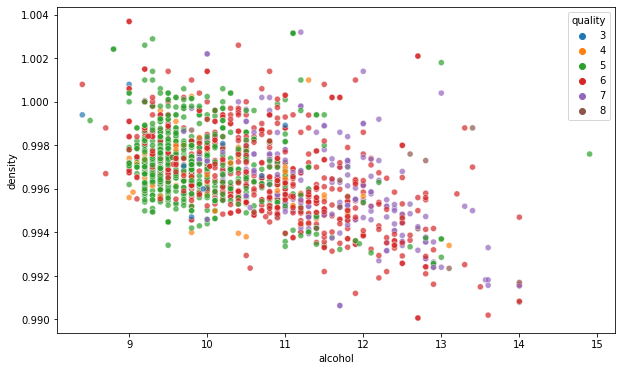

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['alcohol'],data['density'],hue=data.quality,palette='tab10',alpha=0.7)

In [84]:
data.alcohol

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [85]:
# correlation of the features

data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

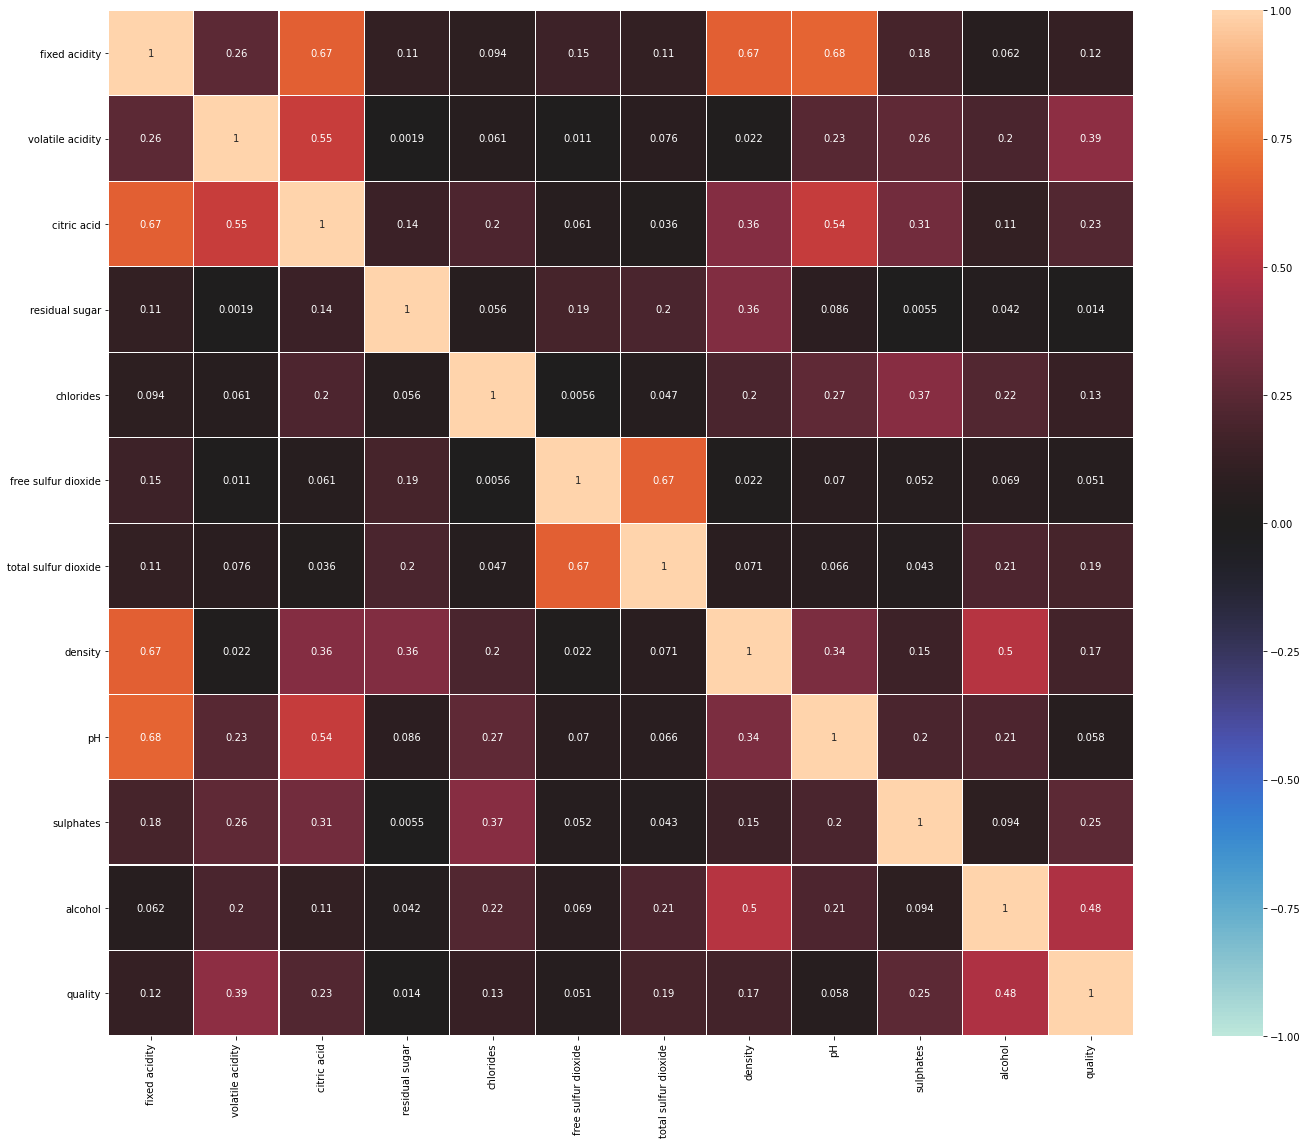

In [86]:
#Plotting HeatMap(Correlation matrix)
df_corr = data.corr().abs()


plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1, vmax=1, annot=True,
           square=True, center=0, fmt='.2g',linewidths=.15)
plt.tight_layout()

In [87]:
#As expectedthe target variable quality has a good correlation with the volatile acidity and alcohol features

outcomes getting from the hit map

The higher the quality of the wine ,the lower the volatile acidity. This mean the wines with high quality undergo very less dilution.
There is relatively bit more average sugar in the cheapest wine.
Most of the sulhur dioxide is found in the wines of average quality and as they have more sulfur-dioxide they have to trade it of with alcohol content
The best quality wines have the highest concentration of alcohol.

# Processing outliers

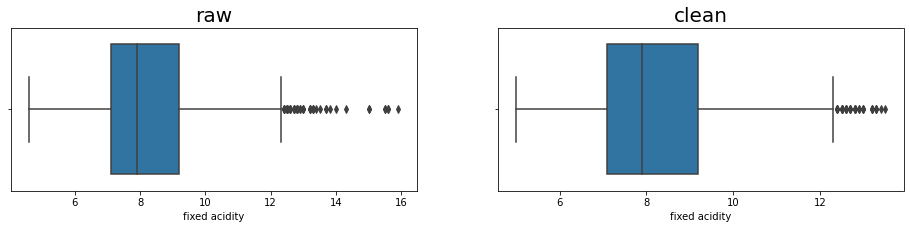

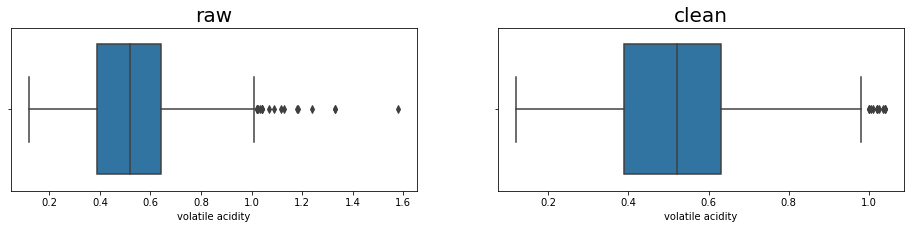

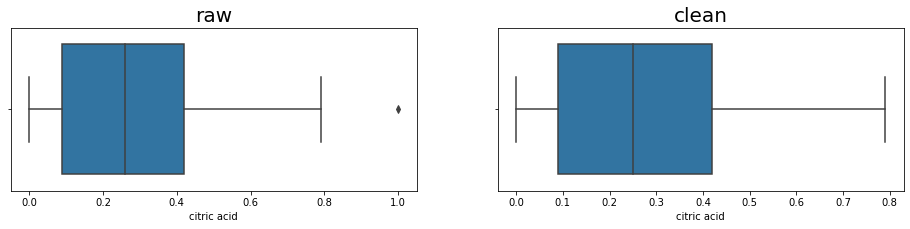

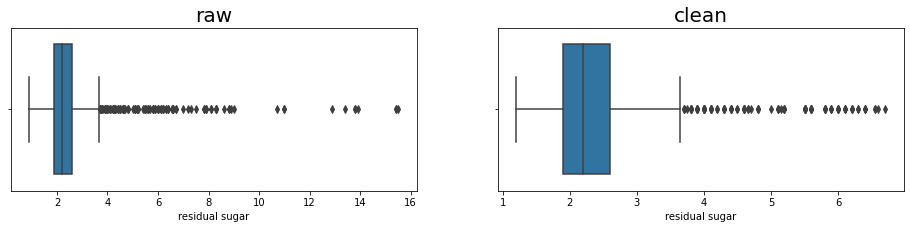

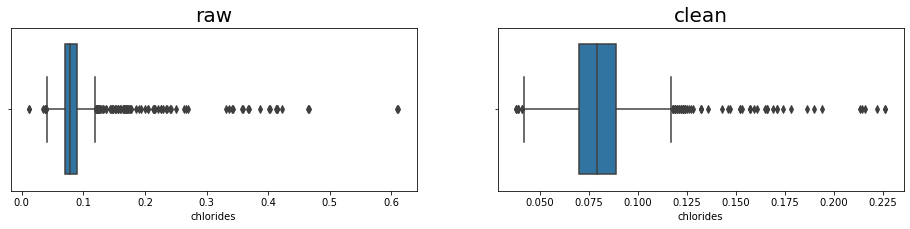

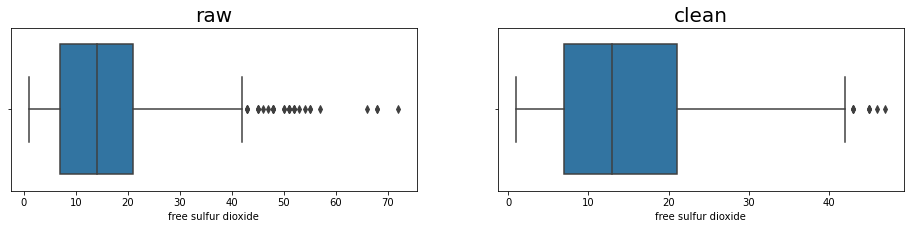

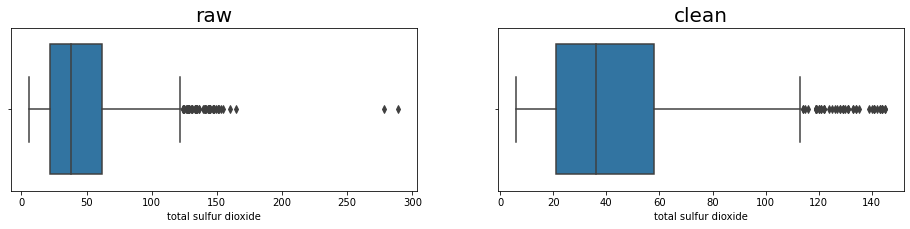

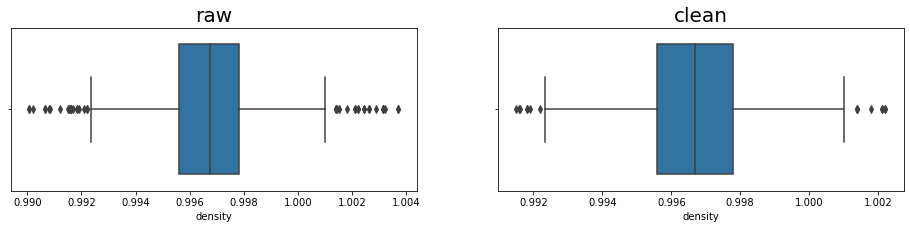

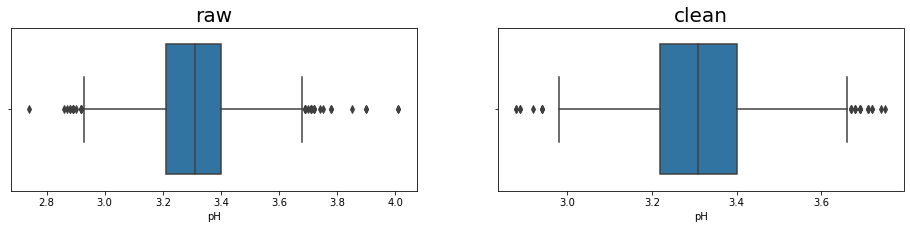

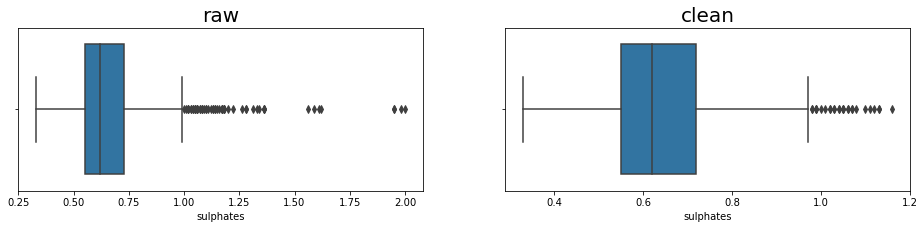

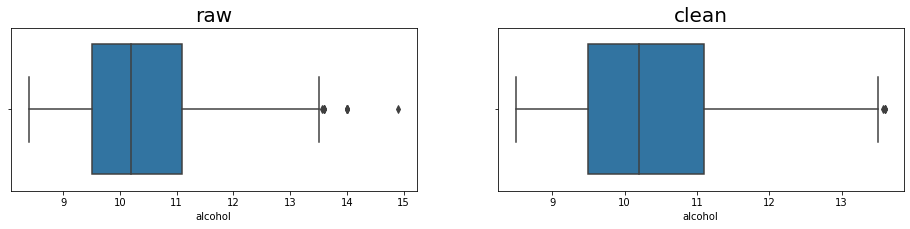

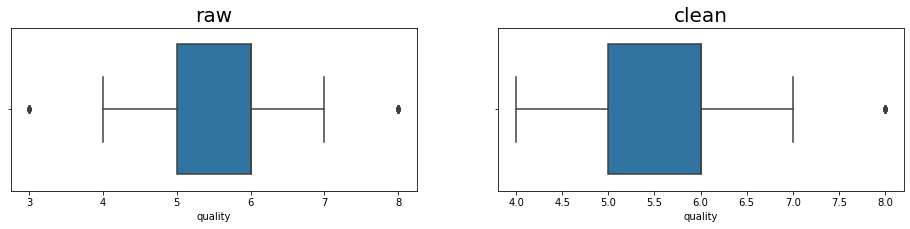

In [88]:

# let's find out the outliers using the dataset  using the z_score

z_scores = stats.zscore(data)  # calculate the z_score of the dataframe


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned_z = data[filtered_entries]

for col in data.columns:
    
    fig = plt.figure(figsize=(16,3))
    

    fig.add_subplot(121)
    plt.title('raw',fontsize=20)
    sns.boxplot(data[col])
    

    fig.add_subplot(122)
    plt.title('clean',fontsize=20)
    sns.boxplot(df_cleaned_z[col])

    plt.show()

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


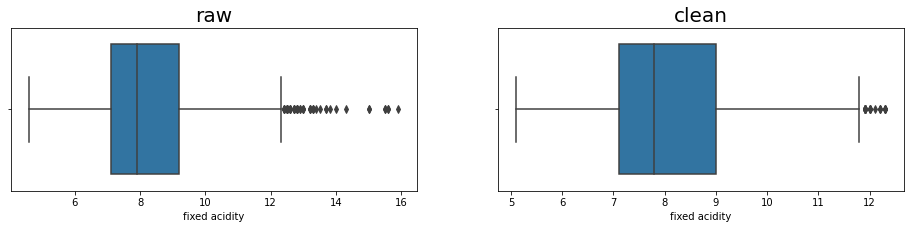

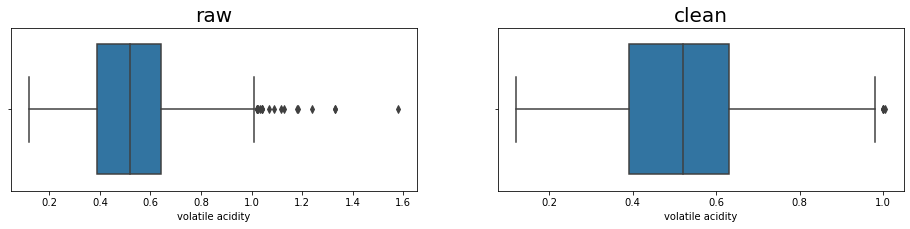

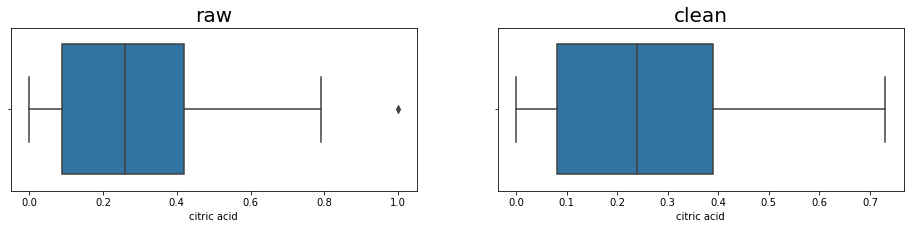

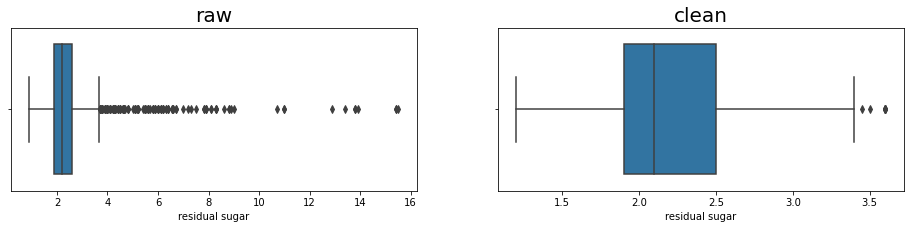

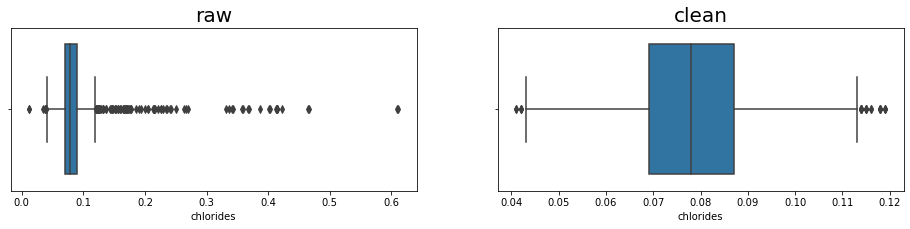

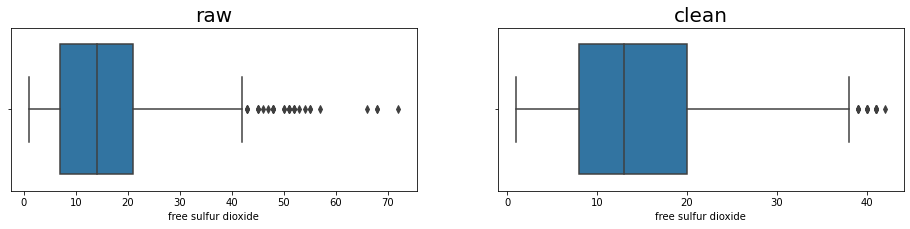

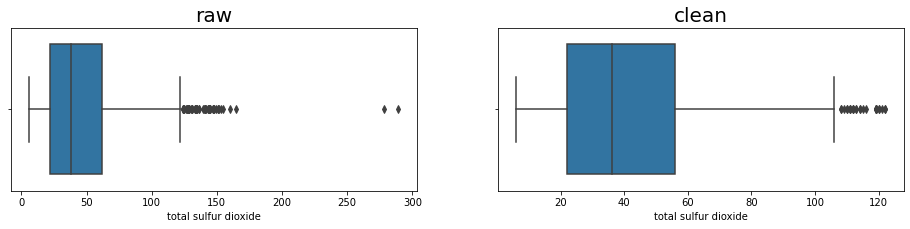

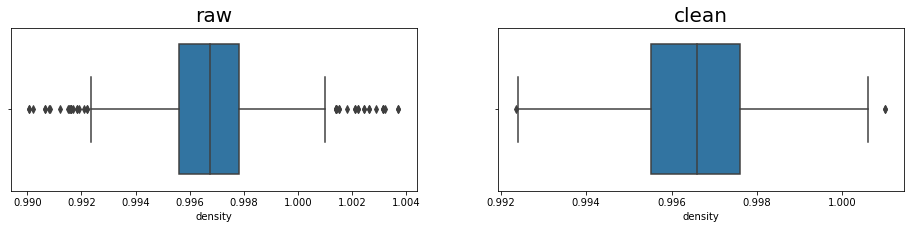

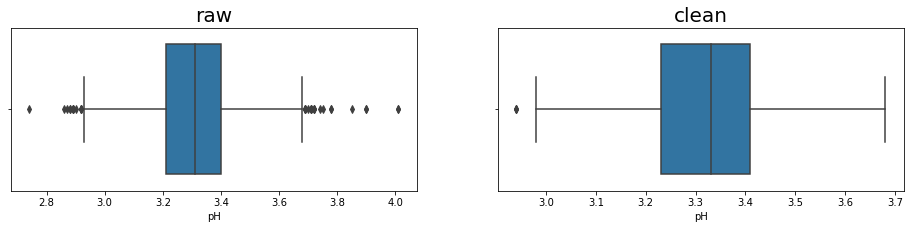

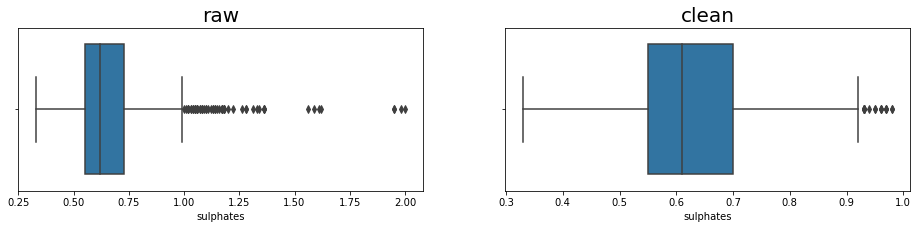

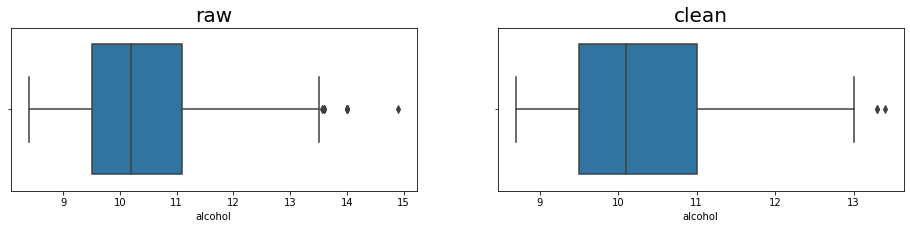

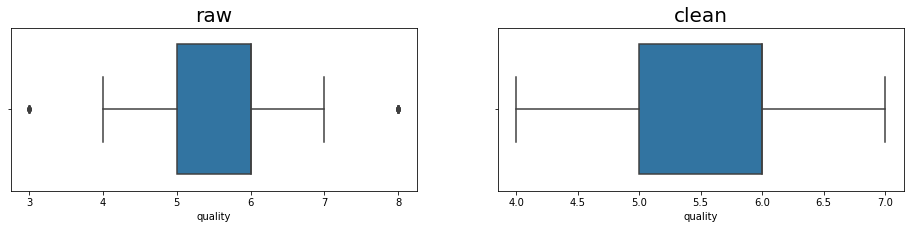

In [89]:
# finding using IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_cleaned_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

for col in data.columns:
    
    fig = plt.figure(figsize=(16,3))
    

    fig.add_subplot(121)
    plt.title('raw',fontsize=20)
    sns.boxplot(data[col])
    

    fig.add_subplot(122)
    plt.title('clean',fontsize=20)
    sns.boxplot(df_cleaned_iqr[col])

    plt.show()

# z score vs IQR

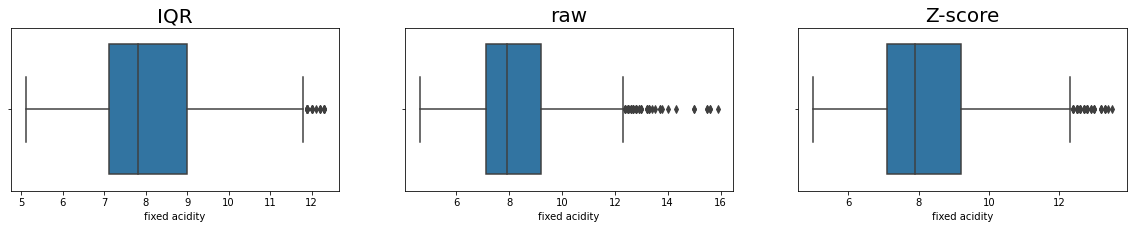

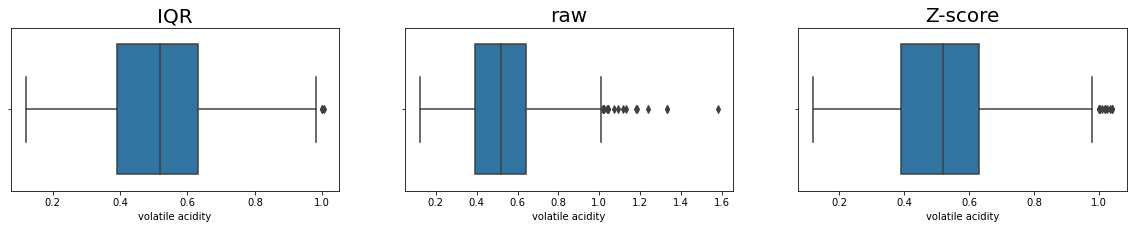

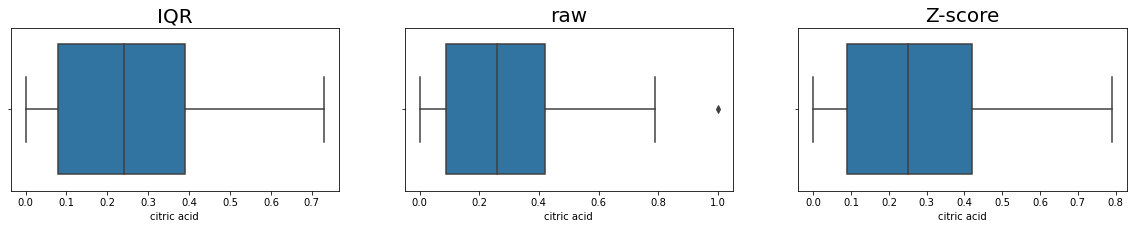

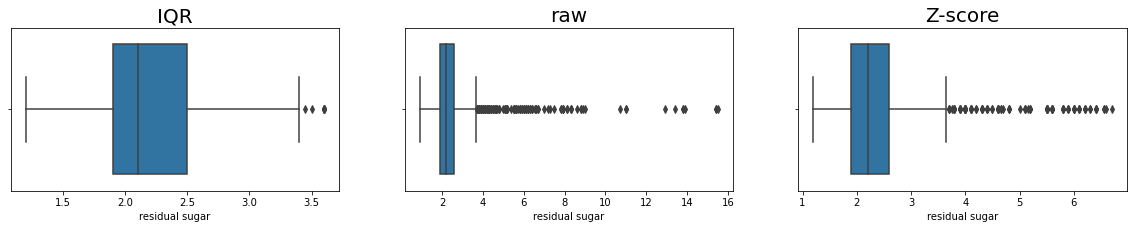

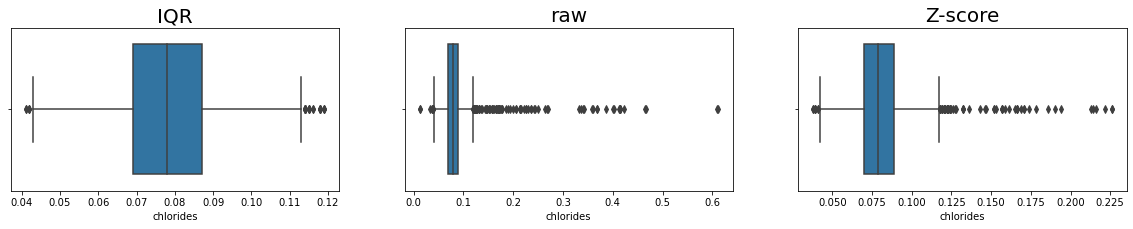

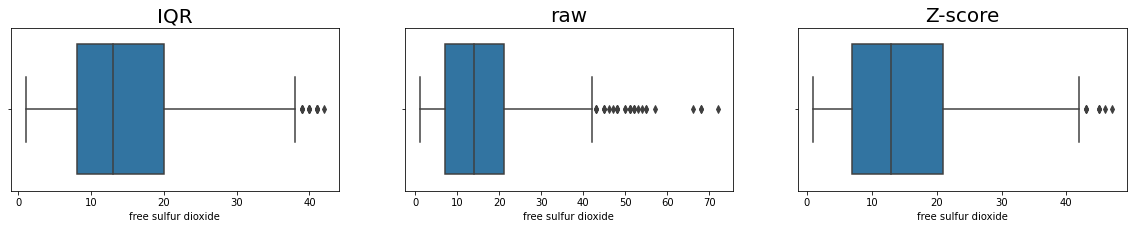

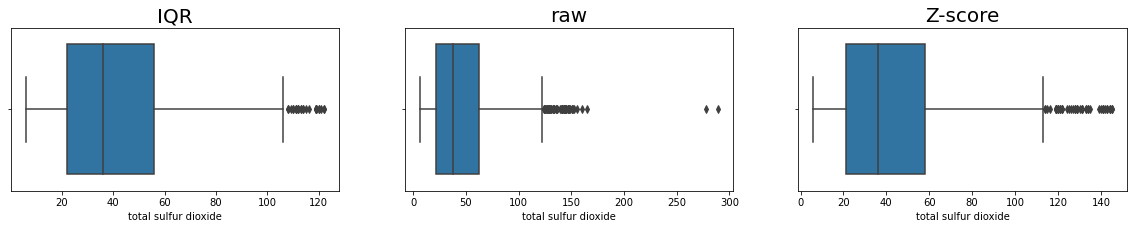

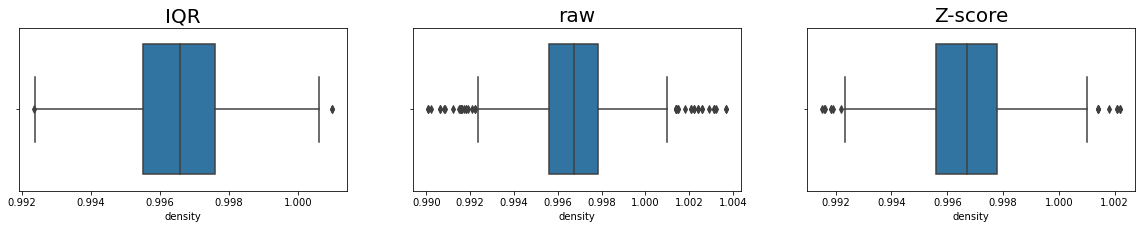

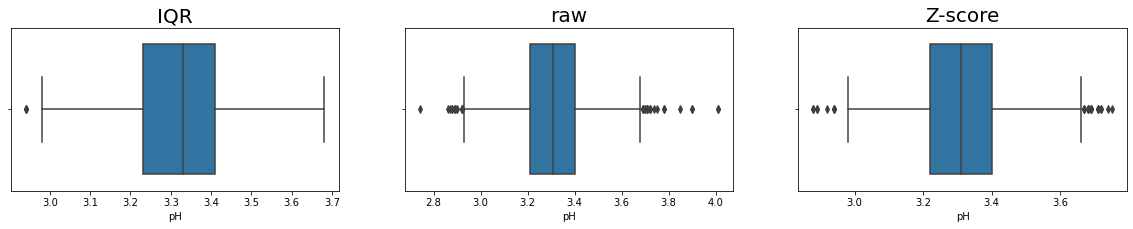

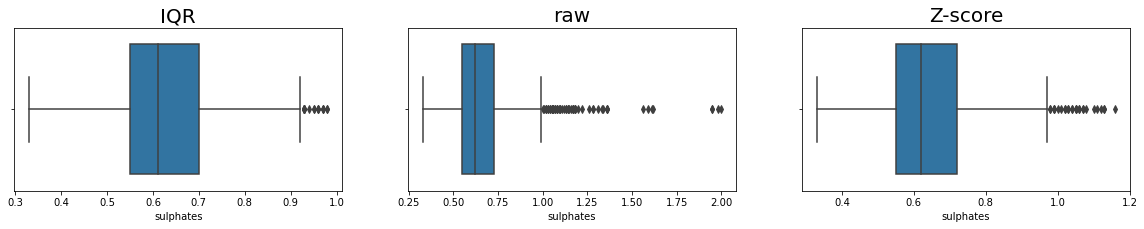

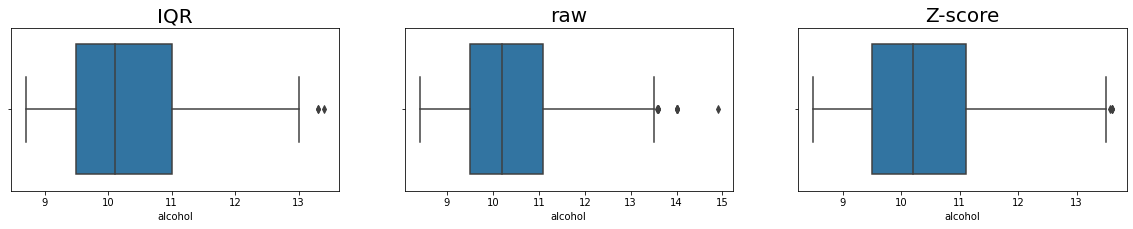

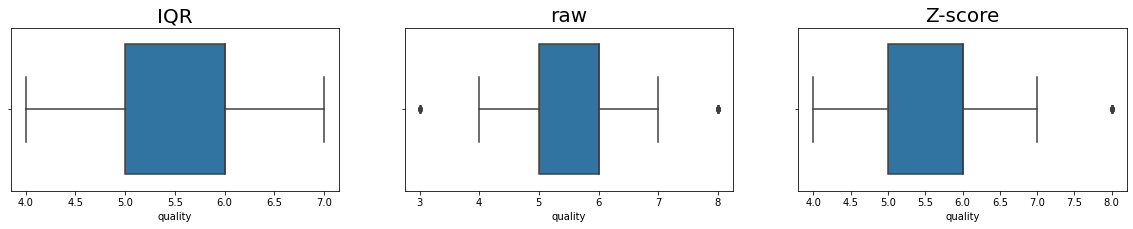

In [90]:
# comparing both the techniques with the original raw data
for col in data.columns:
    
    fig = plt.figure(figsize=(20,3))
    

    fig.add_subplot(131)
    plt.title('IQR',fontsize=20)
    sns.boxplot(df_cleaned_iqr[col])
    
    fig.add_subplot(132)
    plt.title('raw',fontsize=20)
    sns.boxplot(data[col])

    fig.add_subplot(133)
    plt.title('Z-score',fontsize=20)
    sns.boxplot(df_cleaned_z[col])
     

    
    plt.show()

We can see that IQR does a pretty good job of removal of the outliers

In [91]:
#finalize IQR data frame

In [92]:
df_cleaned = df_cleaned_iqr.copy()

In [93]:
df_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [94]:
#lets see for the skewness

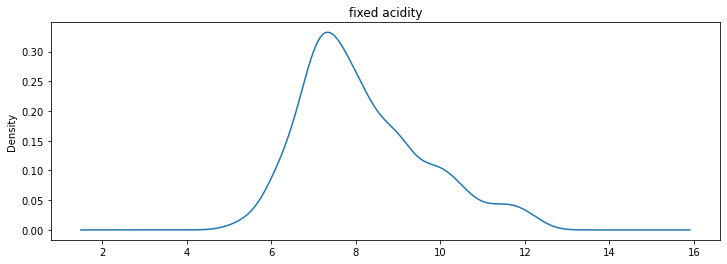

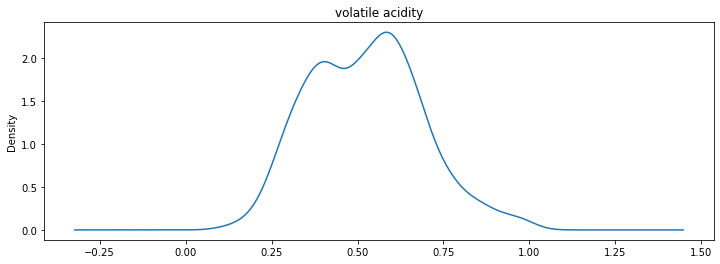

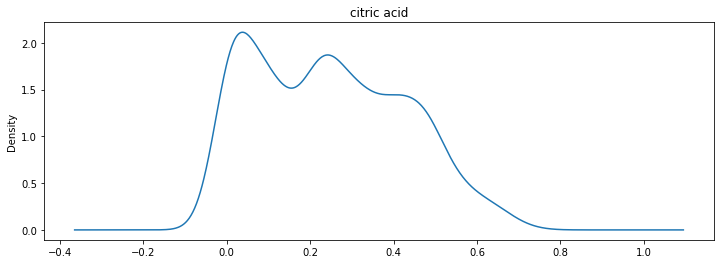

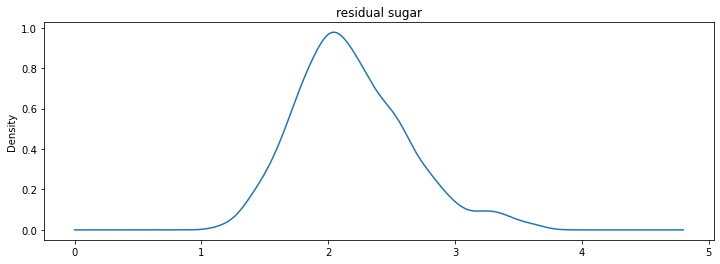

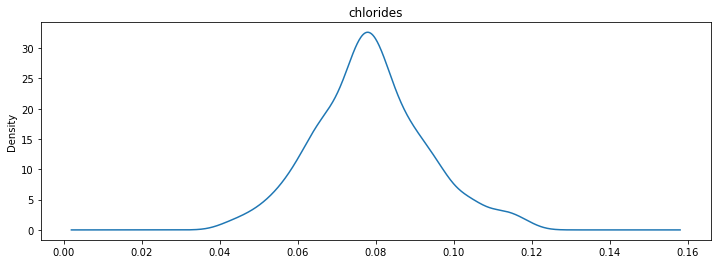

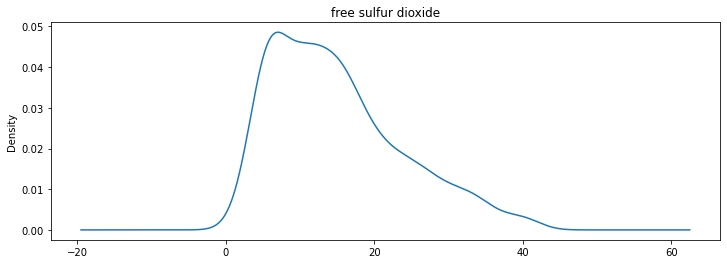

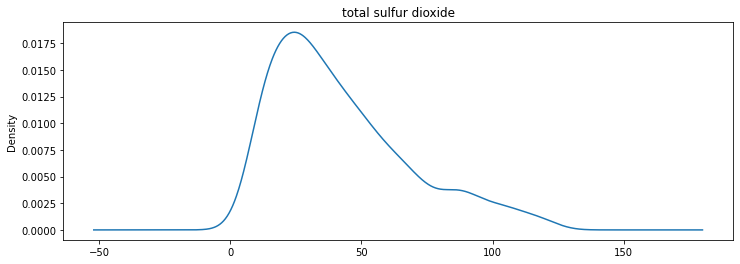

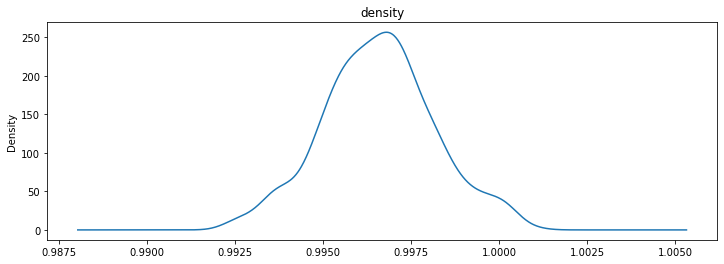

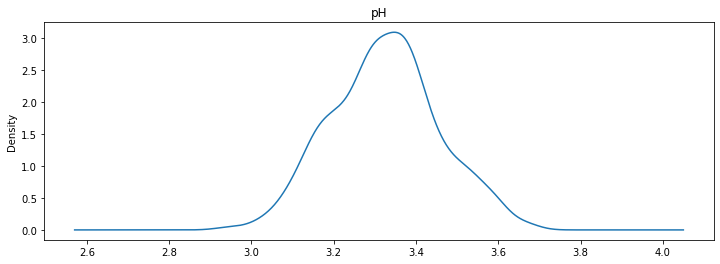

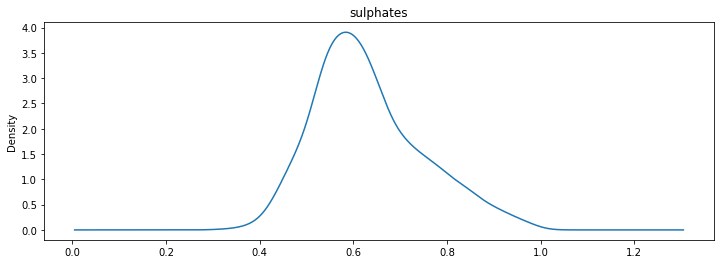

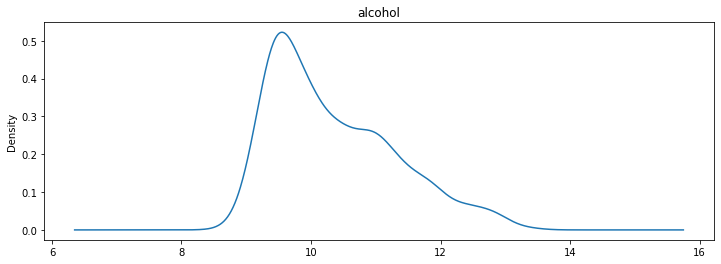

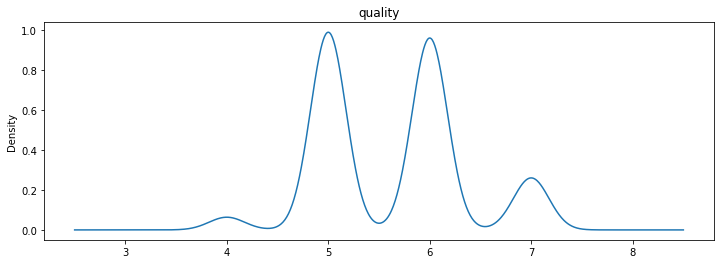

In [95]:
for col in df_cleaned.columns:

        plt.title(col)
        df_cleaned[col].plot.density(figsize=(12,4))
        plt.show()

In [96]:
# skewness in values
skew_per_col = stats.skew(data)
skew_per_col = np.round(skew_per_col,2)

In [97]:

skew_per_col_df = pd.DataFrame(list(zip(data.columns,skew_per_col)),columns=['feature','skewness'])
skew_per_col_df['acceptable'] = skew_per_col_df['skewness']
skew_per_col_df['acceptable'] = skew_per_col_df['acceptable'].apply(lambda x:'Yes' if abs(x) < 1 else 'No')

In [98]:
skew_per_col_df

,feature,skewness,acceptable
0,fixed acidity,0.98,Yes
1,volatile acidity,0.67,Yes
2,citric acid,0.32,Yes
3,residual sugar,4.54,No
4,chlorides,5.68,No
5,free sulfur dioxide,1.25,No
6,total sulfur dioxide,1.51,No
7,density,0.07,Yes
8,pH,0.19,Yes
9,sulphates,2.43,No


In [99]:
# colums to transform
skewed_cols = list(skew_per_col_df.feature.where(abs(skew_per_col_df.skewness)>1).dropna())
skewed_cols

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates']

In [100]:
# log transformation
df_clean_skew = df_cleaned.copy()
df_clean_skew[skewed_cols] = np.log(df_clean_skew[skewed_cols])

In [101]:
# check the skew of the transformed columns
stats.skew(df_clean_skew).reshape(-1,1)

array([[ 0.73688144],
       [ 0.26926177],
       [ 0.31117035],
       [ 0.02987533],
       [-0.3906027 ],
       [-0.34768509],
       [-0.21542911],
       [ 0.05187523],
       [ 0.06057182],
       [ 0.16595023],
       [ 0.78152439],
       [ 0.25642334]])

In [102]:
# let's plot the skew of the log transformed data


skew_per_col_df['log_skewness'] = stats.skew(df_clean_skew)
skew_per_col_df['log_acceptable'] = skew_per_col_df['log_skewness']
skew_per_col_df['log_acceptable'] = skew_per_col_df['log_acceptable'].apply(lambda x:'Yes' if abs(x) < 1 else 'No')

In [103]:
skew_per_col_df

,feature,skewness,acceptable,log_skewness,log_acceptable
0,fixed acidity,0.98,Yes,0.736881,Yes
1,volatile acidity,0.67,Yes,0.269262,Yes
2,citric acid,0.32,Yes,0.311170,Yes
3,residual sugar,4.54,No,0.029875,Yes
4,chlorides,5.68,No,-0.390603,Yes
5,free sulfur dioxide,1.25,No,-0.347685,Yes
6,total sulfur dioxide,1.51,No,-0.215429,Yes
7,density,0.07,Yes,0.051875,Yes
8,pH,0.19,Yes,0.060572,Yes
9,sulphates,2.43,No,0.165950,Yes


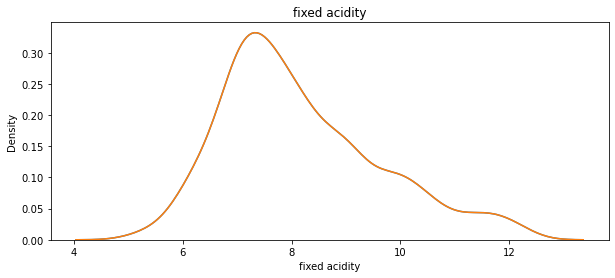

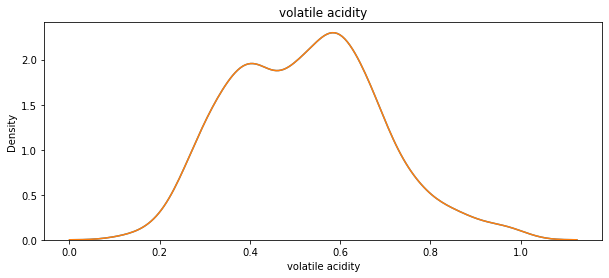

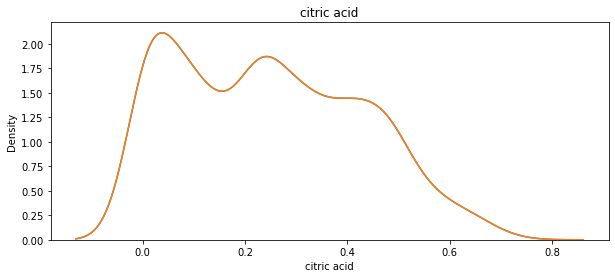

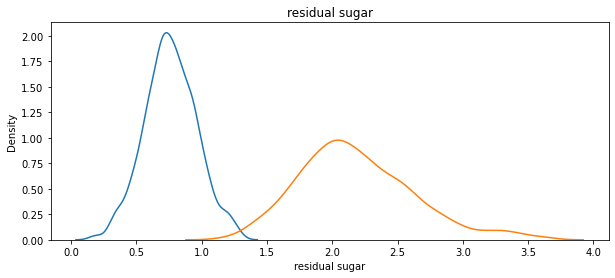

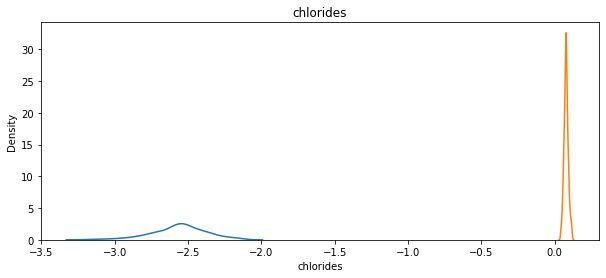

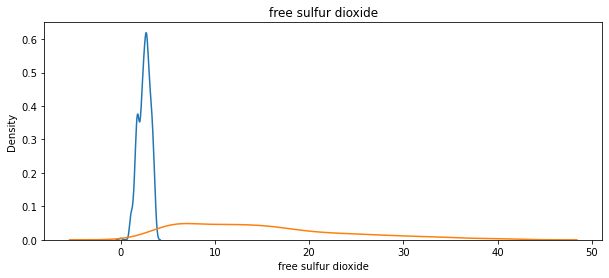

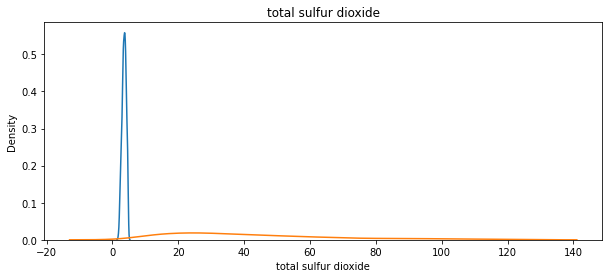

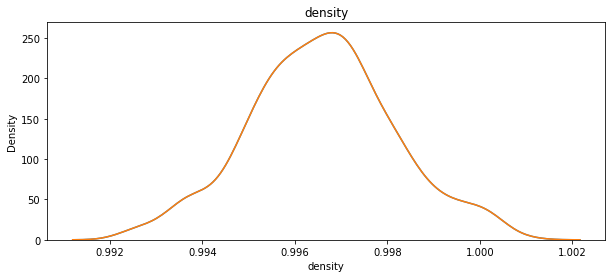

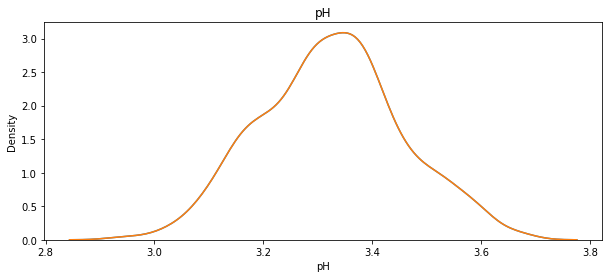

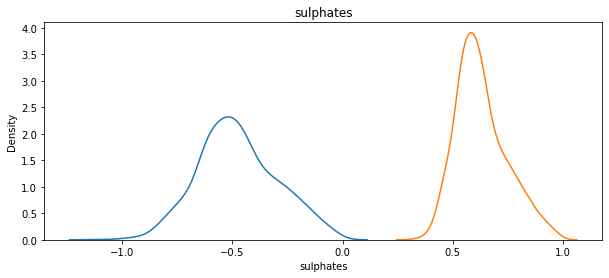

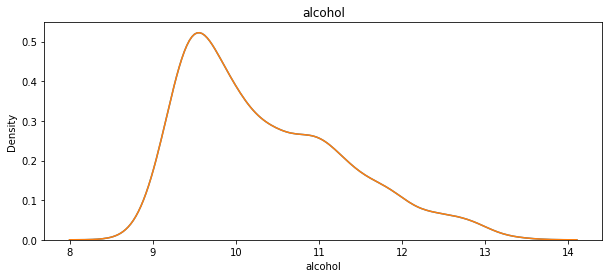

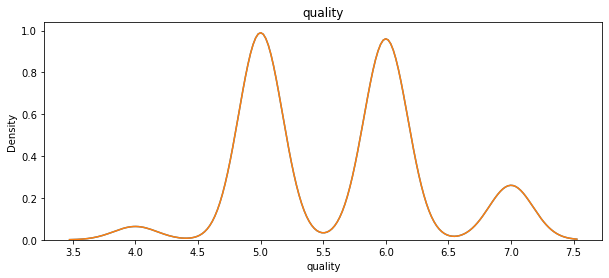

In [104]:
for col in df_clean_skew:

        plt.figure(figsize=(10,4))
        plt.title(col)
        sns.kdeplot(df_clean_skew[col])
        sns.kdeplot(df_cleaned[col])
        plt.show()

In [105]:
df_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [106]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Train the model

In [107]:
df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
x = df_cleaned.drop(columns = 'quality')
y = df_cleaned['quality']

In [109]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [110]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

In [111]:
# shape
x.shape,y.shape

((1179, 11), (1179,))

In [112]:
# requirement of the scaling algo
y = np.expand_dims(y,1)

In [113]:
# shape
x.shape,y.shape

((1179, 11), (1179, 1))

# Train Test Split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state=41)

In [115]:
# shape check
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((884, 11), (884, 1)), ((295, 11), (295, 1)))

In [116]:
y_train

array([[5],
       [5],
       [6],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [4],
       [6],
       [5],
       [6],
       [6],
       [6],
       [6],
       [5],
       [6],
       [7],
       [6],
       [5],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [6],
       [4],
       [5],
       [6],
       [6],
       [6],
       [6],
       [5],
       [7],
       [5],
       [7],
       [5],
       [7],
       [6],
       [6],
       [7],
       [6],
       [5],
       [6],
       [6],
       [6],
       [7],
       [6],
       [6],
       [6],
       [6],
       [5],
       [6],
       [5],
       [6],
       [5],
       [6],
       [6],
       [7],
       [7],
       [6],
       [6],
       [6],
       [7],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [4],
       [6],
       [6],
       [7],
       [5],
       [7],
    

# Feature Scaling

In [117]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit the standard scalar to the training data and transform it and only transform the data to the test data and do never fit it
# fitting the scaling to the data may lead to failing of generalization of the model on the new train (overfitting).
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [118]:
#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.transform(y_test)

# Finding the best model

In [119]:
### Importing training dependencies
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

### Import resting dependencies
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [120]:
def train_n_score(input_model):
  """
  Input: model with parameters.
  Output: prediction on the test set followed by accuracy score of the model on the test set. 
  """

  model = input_model
  model.fit(x_train,y_train.ravel())
    

  y_preds = model.predict(x_test)
  
  score = model.score(x_test,y_test)

  return y_preds,score


In [121]:
# simple linear regresion
y_preds,score = train_n_score(LinearRegression())
lr_r2 = r2_score(y_test,y_preds)
lr_r2

0.3818823005542401

In [122]:
# svr
y_preds,score = train_n_score(SVR(kernel='linear'))
svr_r2 = r2_score(y_test,y_preds)
svr_r2

0.35837331265537054

In [123]:
# Decision tree
y_preds,score = train_n_score(DecisionTreeRegressor())
rf_r2 = r2_score(y_test,y_preds)
rf_r2

0.009710269003740057

In [124]:
# random_forest
y_preds,score = train_n_score(RandomForestRegressor())
rf_r2 = r2_score(y_test,y_preds)
rf_r2


0.5315843171270221

In [125]:
# gradient boosting
y_preds,score = train_n_score(GradientBoostingRegressor())
gb_r2 = r2_score(y_test,y_preds)
gb_r2

0.4556678497483272

In [126]:
# AdaBoostRegressor
y_preds,score = train_n_score(AdaBoostRegressor())
ada_r2 = r2_score(y_test,y_preds)
ada_r2

0.39006002639523873

In [127]:
y_preds,score = train_n_score(KNeighborsRegressor())
ada_r2 = r2_score(y_test,y_preds)
ada_r2

0.34893434866849926

In [128]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [129]:
models = [LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),KNeighborsRegressor()]
model_names = 'Linear_reg SVR DecisionTreeReg Random_forest Gradient_boost  Adaboost  KNeighborsRegr'.split()
r2 = []
mse = []
avg_cv = []

for model in models:

  y_preds,score = train_n_score(model)
  
  r2.append(r2_score(y_test,y_preds))
  mse.append(mean_squared_error(y_test,y_preds))
  avg_cv.append(np.mean(cross_val_score(model,x,y.ravel())))

pd.DataFrame(list(zip(model_names,mse,r2,avg_cv)),columns=['model','mse','R2_Score','Avg_CV'])

,model,mse,R2_Score,Avg_CV
0,Linear_reg,0.315263,0.381882,0.326752
1,SVR,0.306860,0.398358,0.117300
2,DecisionTreeReg,0.511864,-0.003582,-0.356218
3,Random_forest,0.243409,0.522763,0.266373
4,Gradient_boost,0.278072,0.454800,0.284215
5,Adaboost,0.311431,0.389396,0.264202
6,KNeighborsRegr,0.332068,0.348934,-0.072349


In [130]:
# best model
best_model = RandomForestRegressor()

best_model.fit(x_train,y_train)

rf_y_preds = best_model.predict(x_test)

best_r2 = r2_score(y_test,rf_y_preds)

best_r2

0.5396289257874105

So we are getting Random Forest Model who  is giving us the best results

In [131]:
print("Accuracy Score:",accuracy_score(y_test.astype('int'),y_preds.astype('int')))

Accuracy Score: 0.559322033898305


<AxesSubplot:>

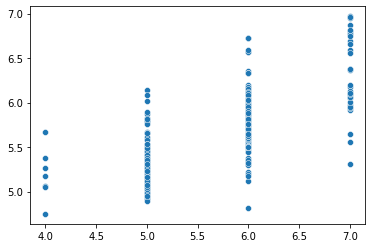

In [132]:
sns.scatterplot(y_test.ravel(),rf_y_preds)

In [133]:
errors_df = pd.DataFrame(list(zip(y_test.ravel(),y_preds.astype('int'),(y_test.ravel()-y_preds.astype('int')))),columns=['True','Predicted','Error Diff'])

In [134]:

errors_df

,True,Predicted,Error Diff
0,5,5,0
1,5,6,-1
2,5,5,0
3,7,6,1
4,4,5,-1
...,...,...,...
290,5,6,-1
291,5,5,0
292,6,6,0
293,5,5,0


In [135]:
#Confusion matrix for multi class
confusion_matrix(y_test.ravel(),y_preds.astype('int'))

array([[  2,   5,   0,   0],
       [  9, 109,  10,   0],
       [  0,  73,  53,   0],
       [  0,   5,  28,   1]], dtype=int64)

In [136]:
accuracy = accuracy_score(y_test.ravel(),y_preds.astype('int'))
accuracy

0.559322033898305

Parameter Tuining

In [137]:
param_grids = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [138]:
rfr = RandomForestRegressor(random_state = 1)

In [139]:
grid_search = GridSearchCV(estimator=rfr,param_grid=param_grids,cv=5,n_jobs=-1)

In [140]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [141]:
best_param = grid_search.best_params_

In [142]:
print(best_param)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}


In [143]:
rfgs = RandomForestRegressor(bootstrap= False, max_features= 'log2', min_samples_split= 10, n_estimators= 50)

In [144]:
rfgs.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2',
                      min_samples_split=10, n_estimators=50)

In [145]:
pred = rfgs.predict(x_test)

In [146]:
print("Accuracy Score:",accuracy_score(y_test.astype('int'),pred.astype('int')))

Accuracy Score: 0.5016949152542373
